<a href="https://colab.research.google.com/github/ganathetechie/AlmaBetter-Capstone-Projects/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In this notebook, we are exploring the playstore apps data which has information about lots of android apps.
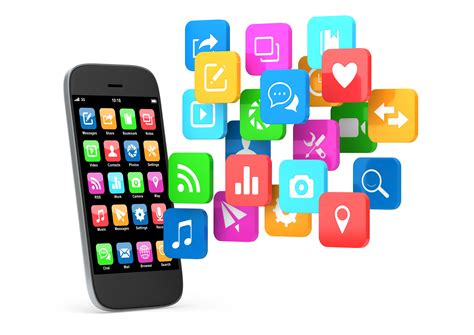 

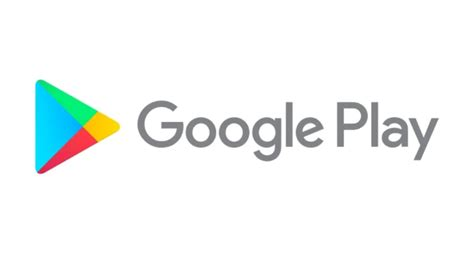



---



---


The data set has 13 parameters or columns with 10,000 + observations. 
Android app market is a billion dollar business and so is highly competetive in nature. This makes the developers to always build applications which drive more engagement and accepted by the large nuumber of audience.
So, it is essential for the app developers to know the statistics and draw insignts from the available data in order to understand the market and develop applications which drive more business.

Therefore, we should draw some key insights from the available dataset to answer some of the following questions:



1.   Which apps has highest number of installs among paid and free?
2.   Which category has the highest users in paid and free app markets?
3.   What is the average price of the apps in each category among paid apps?
4.   What are the top 10 apps in terms of revenue?
5.   Comparing user ratings between paid and free apps across the categories.
6.   Find the most popular apps in the market, Infer some reasons for popularity.
7.   Which is the top app category in terms of installs?
8.   Reason around the factors that influence the user ratings, engagement and satisfaction in the app market
9.   Find the correlation between:
        *   Content category - Genres
        *   








---






# **Importing the required libraries and dataset for exploration**

In [ ]:
# Importing the pandas,matplotlib and seaborn libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Mounting the google drive to the colab notebook
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Let us read the data set into the colab environment**

In [ ]:
# Loading the dataset

directory_path = '/content/drive/MyDrive/AlmaBetter/Capstone Projects/Capstone-Project-1/data'
apps_df = pd.read_csv(directory_path + '/Play Store Data.csv')

Now that we have loaded the dataset into our colab environment, let us perform basic exploration to understand the attributes and variables in each category better.

In [ ]:
# This gives the top 5 rows in the dataset.
apps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Let us now dive into the columns that we have in the dataset

In [ ]:
apps_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

Also, let us check the datatypes of each variable in the dataset

In [ ]:
apps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


The command `apps_df.info()` gives the datatype of the values present in each column and the count of Non-Null observations in them. If you observe, 


> We have 8 columns (***App, Category, Reviews, Size, Installs, Price, Genres and Last Updated***) with 10841 Non-Null values which implies that no null values are present in these columns which is a sign for a good data.


> Also, we have 4 more columns (*** Type, Content Rating, Current Ver and Android Ver***) with 10833+ observations. We can look and fill this information manually from the playstore.


> But only one parameter ***Ratings*** has 9367 observations **86% Non-Null** and the remaining  **14% as Null values**.

We shall explore the ways to handle these null values in different methods.








Now, we shall see some descriptive statistics of the numerical variables in the dataset.

In [ ]:
apps_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


Observations from above operation:
1. Although, the variables like reviews, price, installs which are technically numerical, they are present in object type which indicates that we should transform the data to a numrical format.
2. The max value of the Rating column is 19, which is not correct for values on a scale of 5. Therefore we should replace the 19 with a max of 5.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


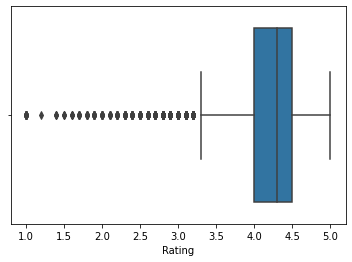

In [52]:
sns.boxplot(apps_df.Rating)